# **Problem Statement**

Mengembangkan model segmentasi pelanggan yang mengkategorikan pemegang kartu kredit ke dalam kelompok berbeda berdasarkan perilaku penggunaannya. Segmentasi ini akan membantu dalam menentukan strategi pemasaran yang ditargetkan dan meningkatkan manajemen hubungan pelanggan.

# **Data Understanding**

Dataset ini berisi perilaku penggunaan dari sekitar 9000 pemegang kartu kredit aktif selama 6 bulan terakhir. Dataset ini mencakup 18 variabel perilaku yang memberikan informasi rinci tentang pola penggunaan kartu kredit masing-masing pelanggan.
*   CUST_ID: Identifikasi pemegang kartu kredit (Kategorikal)
*   BALANCE: Jumlah saldo yang tersisa di akun mereka untuk melakukan pembelian
*   BALANCE_FREQUENCY: Seberapa sering saldo diperbarui, skor antara 0 dan 1 (1 = sering diperbarui, 0 = tidak sering diperbarui)
*   PURCHASES: Jumlah pembelian yang dilakukan dari akun
*   ONEOFF_PURCHASES: Jumlah pembelian maksimum yang dilakukan sekaligus
*   INSTALLMENTS_PURCHASES: Jumlah pembelian yang dilakukan dengan angsuran
*   CASH_ADVANCE: Uang muka tunai yang diberikan oleh pengguna
*   PURCHASES_FREQUENCY: Seberapa sering pembelian dilakukan, skor antara 0 dan 1 (1 = sering membeli, 0 = tidak sering membeli)
*   ONEOFFPURCHASESFREQUENCY: Seberapa sering pembelian dilakukan sekaligus (1 = sering membeli, 0 = tidak sering membeli)
*   PURCHASESINSTALLMENTSFREQUENCY: Seberapa sering pembelian dengan angsuran dilakukan (1 = sering dilakukan, 0 = tidak sering dilakukan)
*   CASHADVANCEFREQUENCY: Seberapa sering uang muka tunai dibayar
*   CASHADVANCETRX: Jumlah transaksi yang dilakukan dengan "Uang Muka Tunai"
*   PURCHASES_TRX: Jumlah transaksi pembelian yang dilakukan
*   CREDIT_LIMIT: Batas kartu kredit untuk pengguna
*   PAYMENTS: Jumlah pembayaran yang dilakukan oleh pengguna
*   MINIMUM_PAYMENTS: Jumlah pembayaran minimum yang dilakukan oleh pengguna
*   PRCFULLPAYMENT: Persentase pembayaran penuh yang dibayar oleh pengguna
*   TENURE: Masa kerja layanan kartu kredit untuk pengguna

Link dataset: https://www.kaggle.com/datasets/arjunbhasin2013/ccdata

In [3]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import  StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.metrics import silhouette_score
import warnings
import pickle

In [2]:
warnings.filterwarnings("ignore", category=FutureWarning, module="seaborn")

In [4]:
df = pd.read_csv('/content/CC GENERAL.csv')

In [5]:
df.head()

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 18 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   CUST_ID                           8950 non-null   object 
 1   BALANCE                           8950 non-null   float64
 2   BALANCE_FREQUENCY                 8950 non-null   float64
 3   PURCHASES                         8950 non-null   float64
 4   ONEOFF_PURCHASES                  8950 non-null   float64
 5   INSTALLMENTS_PURCHASES            8950 non-null   float64
 6   CASH_ADVANCE                      8950 non-null   float64
 7   PURCHASES_FREQUENCY               8950 non-null   float64
 8   ONEOFF_PURCHASES_FREQUENCY        8950 non-null   float64
 9   PURCHASES_INSTALLMENTS_FREQUENCY  8950 non-null   float64
 10  CASH_ADVANCE_FREQUENCY            8950 non-null   float64
 11  CASH_ADVANCE_TRX                  8950 non-null   int64  
 12  PURCHA

In [7]:
df.duplicated().sum()

0

In [8]:
df.isna().sum()

CUST_ID                               0
BALANCE                               0
BALANCE_FREQUENCY                     0
PURCHASES                             0
ONEOFF_PURCHASES                      0
INSTALLMENTS_PURCHASES                0
CASH_ADVANCE                          0
PURCHASES_FREQUENCY                   0
ONEOFF_PURCHASES_FREQUENCY            0
PURCHASES_INSTALLMENTS_FREQUENCY      0
CASH_ADVANCE_FREQUENCY                0
CASH_ADVANCE_TRX                      0
PURCHASES_TRX                         0
CREDIT_LIMIT                          1
PAYMENTS                              0
MINIMUM_PAYMENTS                    313
PRC_FULL_PAYMENT                      0
TENURE                                0
dtype: int64

Terdapat data yang hilang pada MINIMUM_PAYMENTS dan CREDIT_LIMIT.

# **Data Preparation**

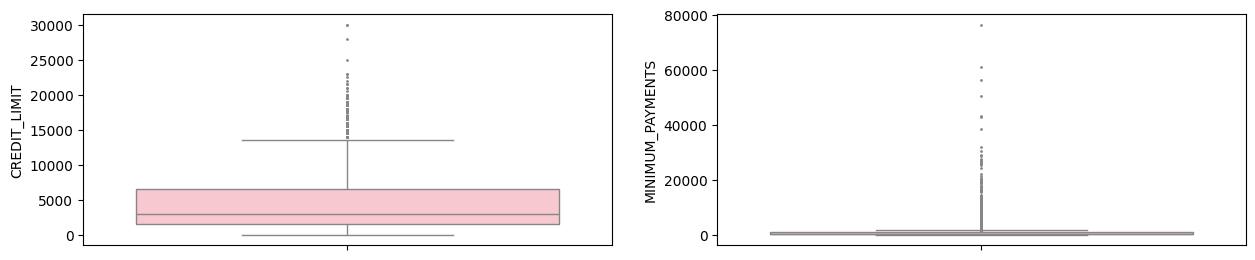

In [10]:
fig, axs = plt.subplots(1, 2, figsize=(15, 3))
sns.boxplot(data=df['CREDIT_LIMIT'], ax=axs[0], fliersize=1, color='pink')
sns.boxplot(data=df['MINIMUM_PAYMENTS'], ax=axs[1], fliersize=1, color='pink')
plt.show()

Distribusi data kolom CREDIT_LIMIT dan MINIMUM_PAYMENTS berdistribusi tidak normal/ skewed, maka dilakukan pengisian nilai yang hilang dengan nilai median.

In [12]:
df['MINIMUM_PAYMENTS'].fillna(df['MINIMUM_PAYMENTS'].median(), inplace=True)
df['CREDIT_LIMIT'].fillna(df['CREDIT_LIMIT'].median(), inplace=True)

In [13]:
df.isnull().sum()

CUST_ID                             0
BALANCE                             0
BALANCE_FREQUENCY                   0
PURCHASES                           0
ONEOFF_PURCHASES                    0
INSTALLMENTS_PURCHASES              0
CASH_ADVANCE                        0
PURCHASES_FREQUENCY                 0
ONEOFF_PURCHASES_FREQUENCY          0
PURCHASES_INSTALLMENTS_FREQUENCY    0
CASH_ADVANCE_FREQUENCY              0
CASH_ADVANCE_TRX                    0
PURCHASES_TRX                       0
CREDIT_LIMIT                        0
PAYMENTS                            0
MINIMUM_PAYMENTS                    0
PRC_FULL_PAYMENT                    0
TENURE                              0
dtype: int64

In [14]:
df = df.drop('CUST_ID', axis=1)

Kolom CUST_ID, merupakan data pribadi pengguna kartu kredit yang tidak diperlukan dalam melakukan clustering sehingga kolom dihapus.

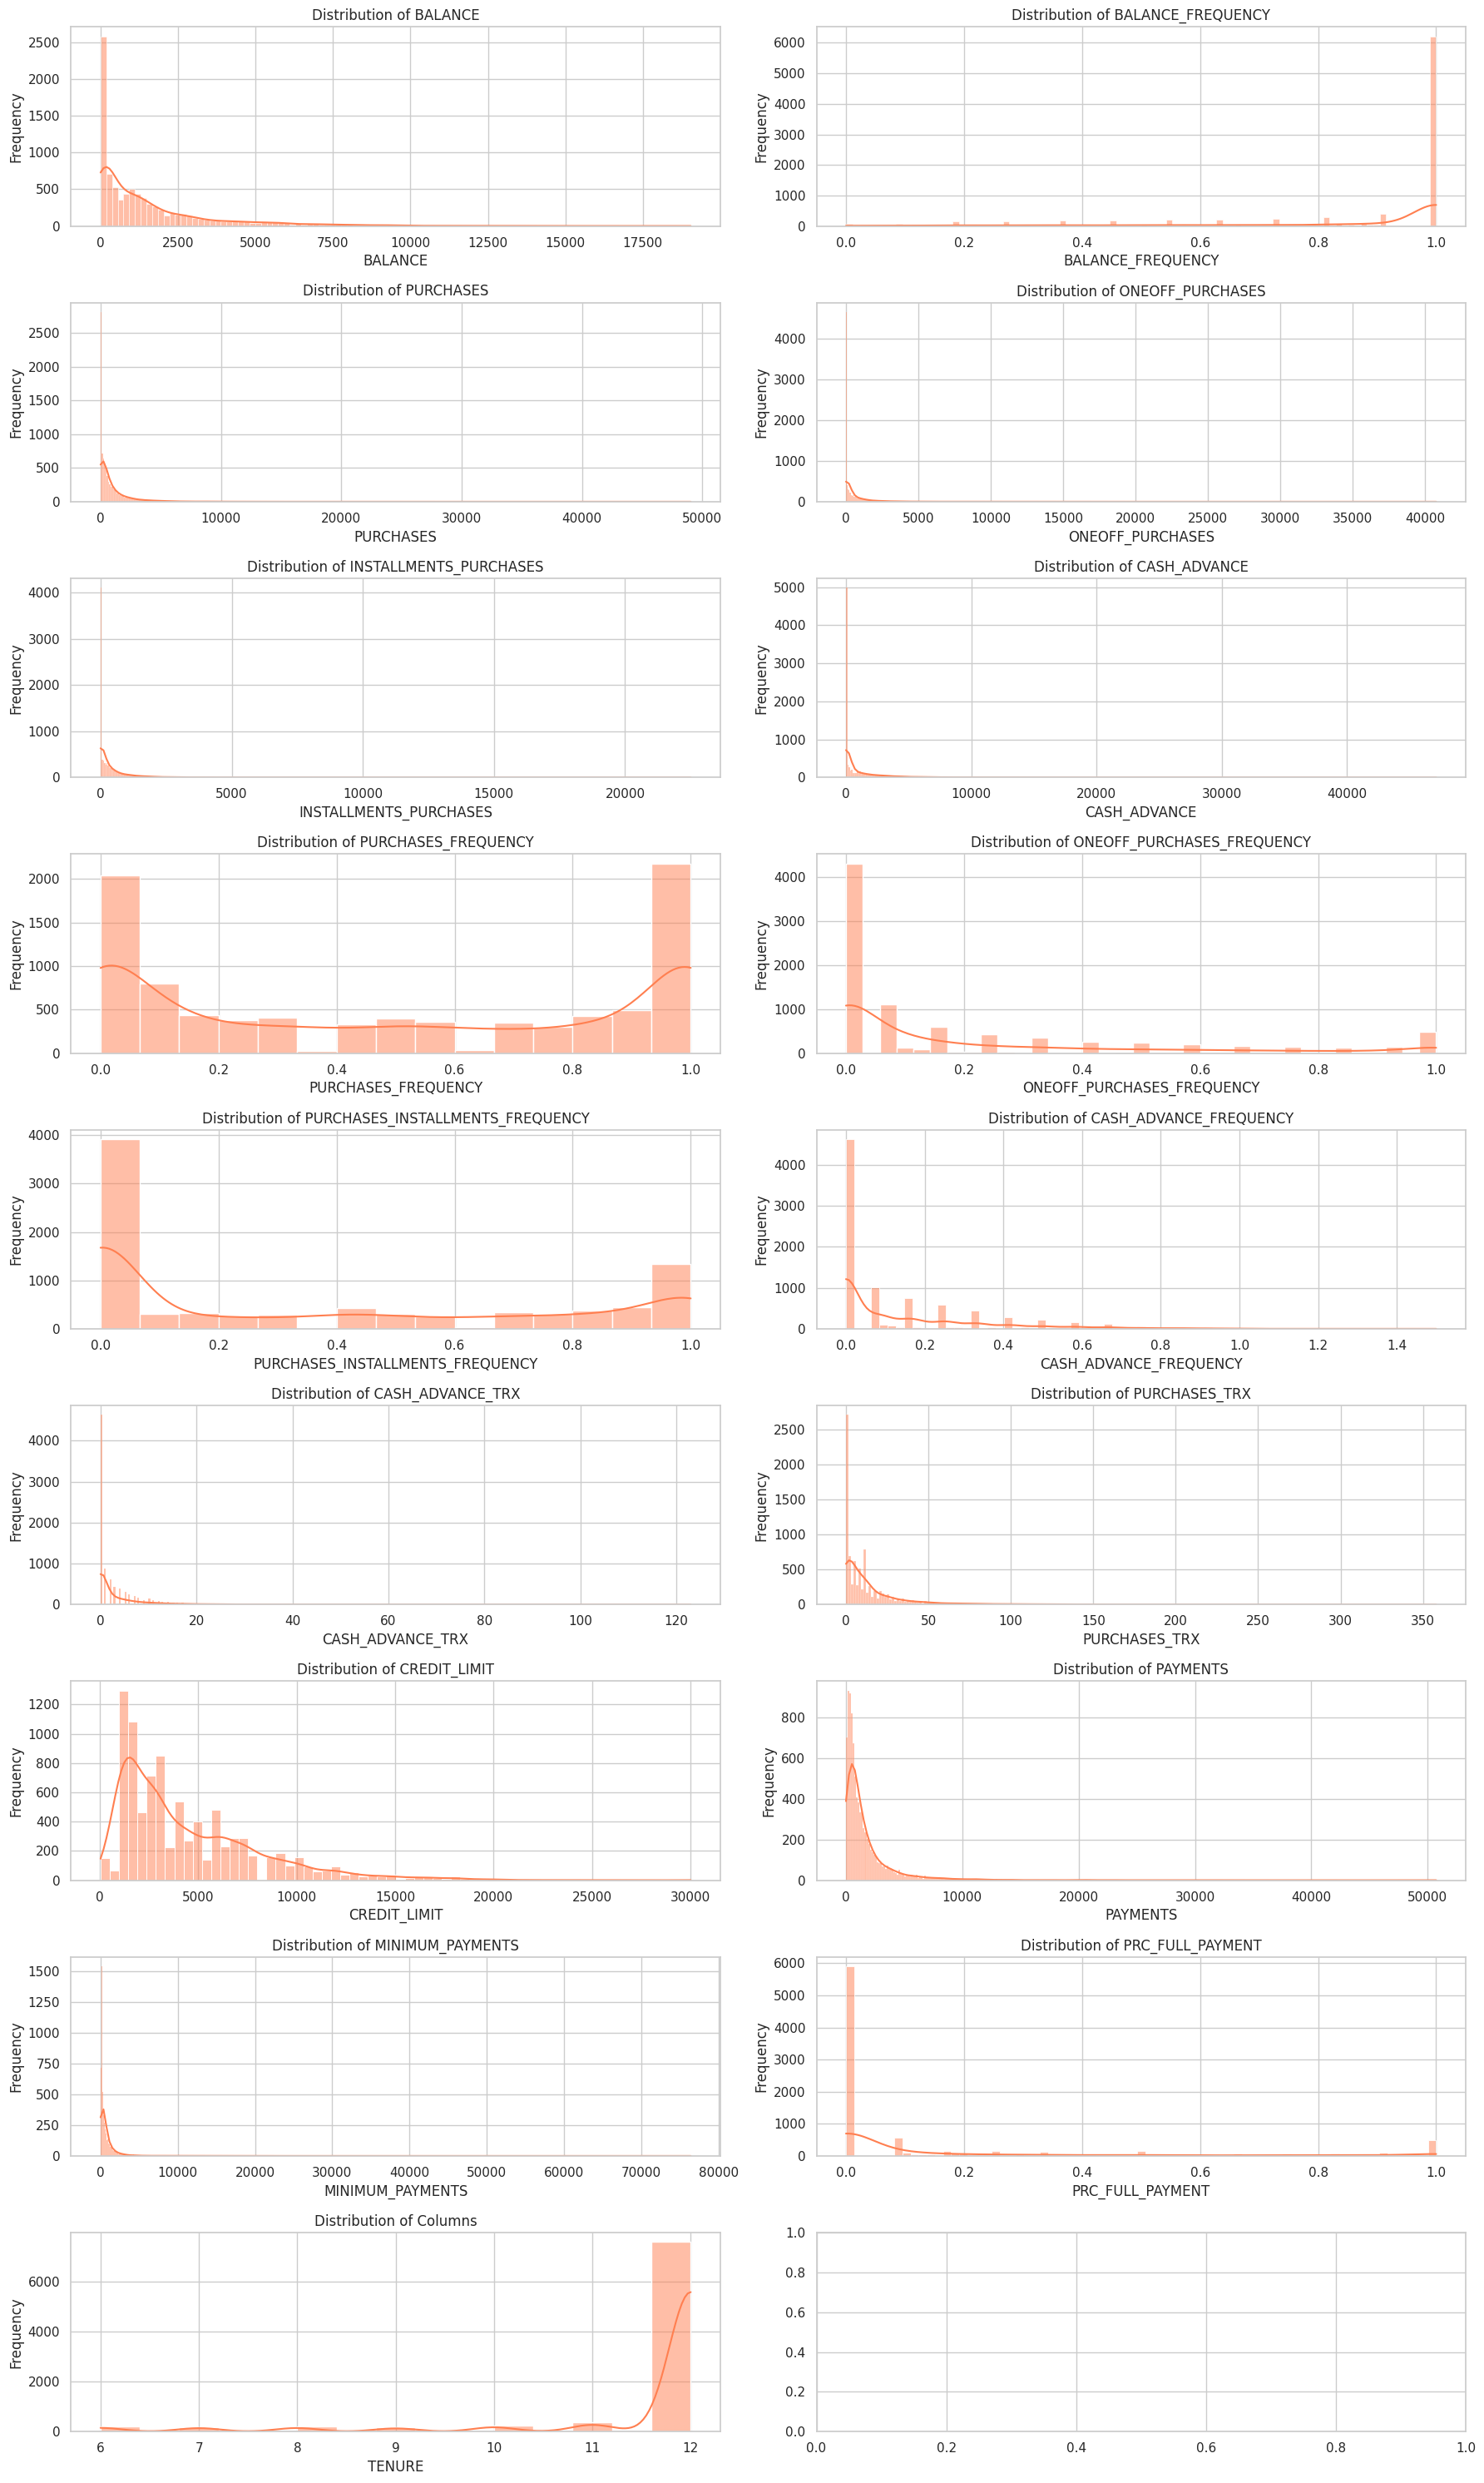

In [16]:
sns.set(style="whitegrid", palette="muted")

num_cols = [column for column in df.columns if df[column].dtype in ['int64', 'float64']]
num_cols_count = len(num_cols)

rows = 9
cols = 2
fig, axes = plt.subplots(rows, cols, figsize=(18, 30))

index = 0

for row in range(rows):
    for col in range(cols):
        if index >=num_cols_count:
            break
        plt.subplot(rows, cols, index + 1)
        sns.histplot(df[num_cols[index]], kde=True, color='coral')
        plt.title(f'Distribution of {num_cols[index]}')
        plt.xlabel(num_cols[index])
        plt.ylabel('Frequency')
        index += 1

plt.tight_layout()
plt.title('Distribution of Columns')
plt.show()

Sebagian besar data cenderung distibusi miring ke kiri (right-skewed) dan nilai tertingginya mendekati nilai 0. Hanya pada kolom tertentu saja yang memiliki perbedaan di antaranya BALANCE_FREQUENCY dan TENURE yang miring ke kanan (Left-skewed). Setiap fitur numerik menunjukkan adanya outliers. Diasumsikan bahwa nilai-nilai outliers ini relevan untuk penelitian. Kolom yang tidak terdapat outlier adalah PURCHASES_FREQUENCY dan PURCHASES_INSTALLMENTS_FREQUENCY.

*   Pengguna cenderung menggunakan kartu kredit dengan tenure pembayaran selama 12 bulan.
*   Kredit Limit Pengguna berkisar antara 0-10000 dan mencapai puncak tertinggi di rentang 0-5000.
*   Jumlah belanja (Purchase) yang sering dilakukan pengguna cenderung kecil di bawah 10000, sehingga jumlah pembayaran dan frequency penggunaan kartu kredit cenderung jarang dan berkisar di nominal yang kecil.
*   Pada grafik PURCHASE_FREQUENCY dan PURCHASES_INSTALLMENTS_FREQUENCY cenderung serupa, sehingga dapat disimpulkan bahwa pembelian yang dilakukan pengguna cenderung dilakukan secara angsuran (PURCHASES_INSTALLMENTS_FREQUENCY).


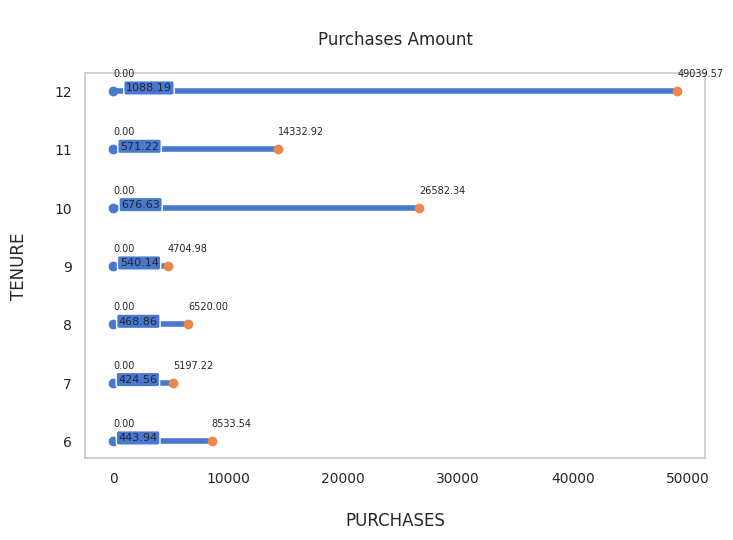

In [17]:
plt.figure(figsize=(8,5))

purc = df[['PURCHASES', 'TENURE']]
purc = purc.groupby('TENURE').agg(MIN=('PURCHASES', 'min'), AVG=('PURCHASES', 'mean'), MAX=('PURCHASES', 'max')).reset_index()
tenure = sorted(df['TENURE'].unique())
min_sct = plt.scatter(x=purc['MIN'], y=purc['TENURE'])
max_sct = plt.scatter(x=purc['MAX'], y=purc['TENURE'])

for i in range(len(tenure)):
    purc_x = purc[purc['TENURE']==tenure[i]]
    plt.hlines(y=purc_x['TENURE'], xmin=purc_x['MIN'], xmax=purc_x['MAX'], linewidth=4, zorder=0)
    plt.annotate('{0:.2f}'.format(purc_x['MIN'].values[0]), xy=(purc_x['MIN'].values[0], purc_x['TENURE'].values[0]+0.25), fontsize=7)
    plt.annotate('{0:.2f}'.format(purc_x['AVG'].values[0]), xy=(purc_x['AVG'].values[0], purc_x['TENURE'].values[0]), fontsize=8, bbox=dict(boxstyle='round', pad=0.2))
    plt.annotate('{0:.2f}'.format(purc_x['MAX'].values[0]), xy=(purc_x['MAX'].values[0], purc_x['TENURE'].values[0]+0.25), fontsize=7)

plt.xlabel('\nPURCHASES')
plt.ylabel('TENURE\n')
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.grid(axis='y', alpha=0)
plt.grid(axis='x', which='major')
plt.title('\nPurchases Amount\n')
plt.show()

Pengguna yang memilih Tenure 12 bulan menduduki puncak statistik dengan Jumlah belanja maximum 49039.57 dengan rata-rata jumlah belanja 1088.19. Tenure 10 bulan menduduki peringkat kedua dengan maksimum jumlah belanja sebesar 26582.34 dan rata-rata jumlah belanja sebesar 676.63. Tenure 11 bulan menduduki peringkat ketiga dengan maksimum belanja sebesar 14332.92 dan rata-rata 571.22.

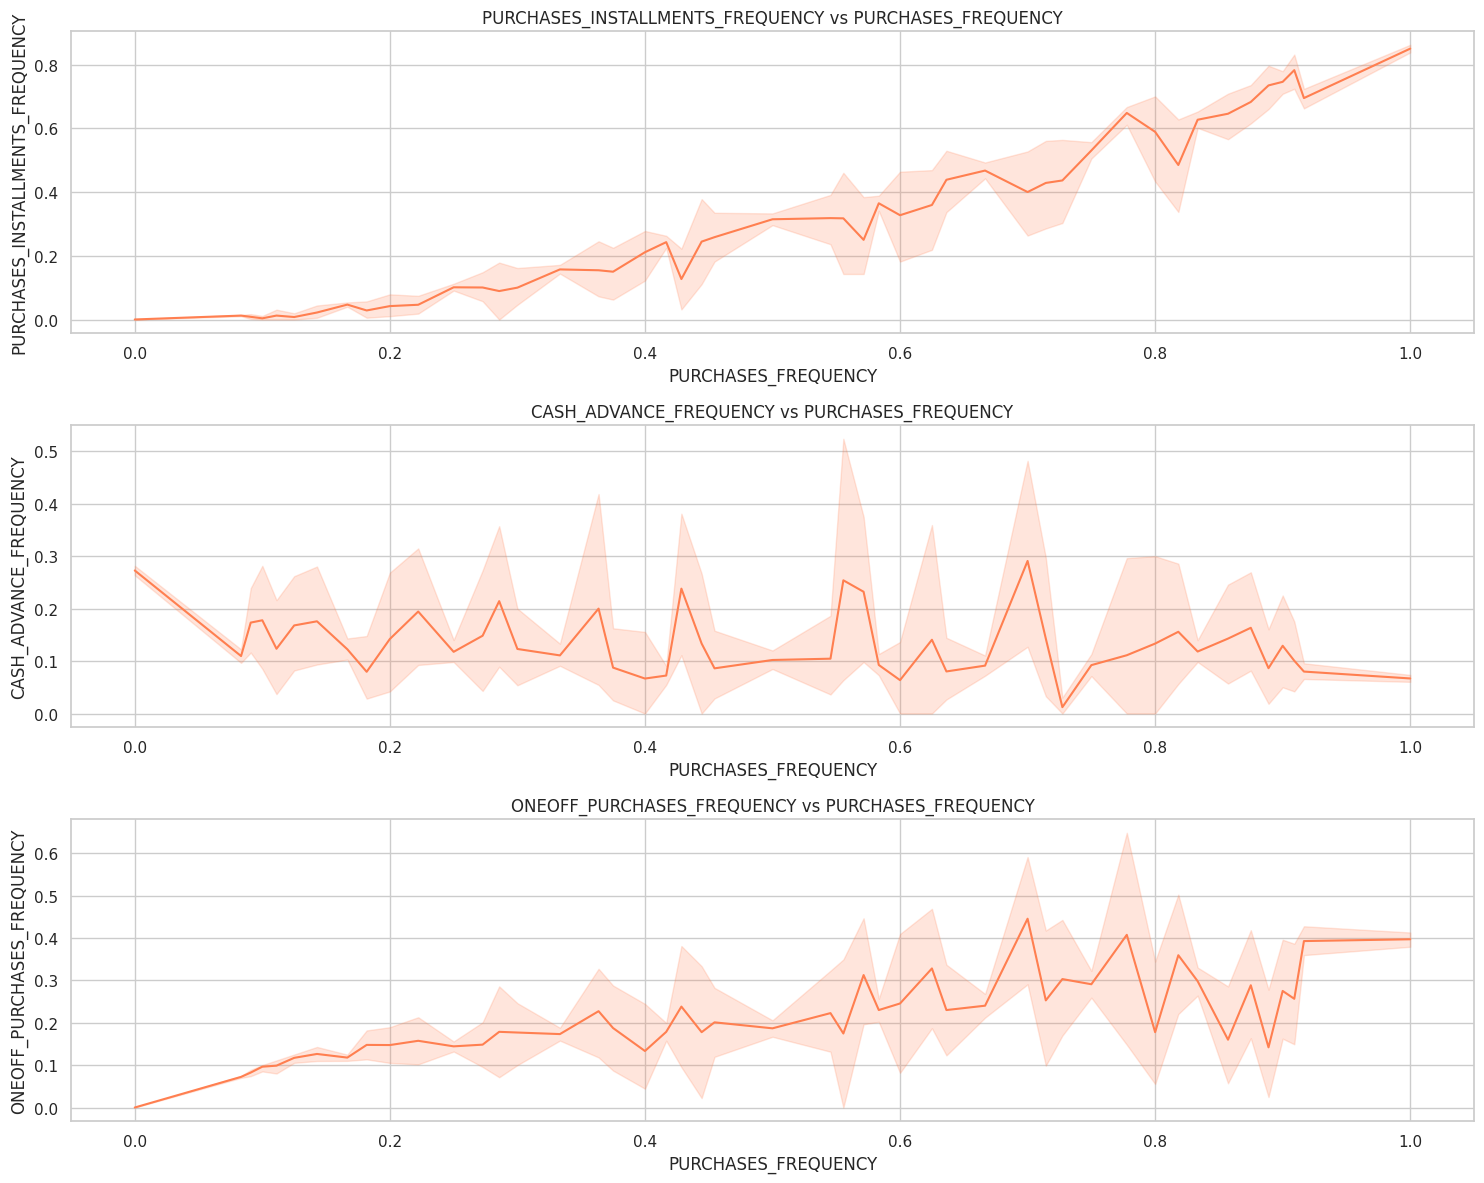

In [18]:
fig, axes = plt.subplots(3, 1, figsize=(15,12))
sns.lineplot(ax=axes[0], x='PURCHASES_FREQUENCY', y='PURCHASES_INSTALLMENTS_FREQUENCY', data=df, color='coral')
axes[0].set_title('PURCHASES_INSTALLMENTS_FREQUENCY vs PURCHASES_FREQUENCY')
sns.lineplot(ax=axes[1], x='PURCHASES_FREQUENCY', y='CASH_ADVANCE_FREQUENCY', data=df, color='coral')
axes[1].set_title('CASH_ADVANCE_FREQUENCY vs PURCHASES_FREQUENCY')
sns.lineplot(ax=axes[2], x='PURCHASES_FREQUENCY', y='ONEOFF_PURCHASES_FREQUENCY', data=df, color='coral')
axes[2].set_title('ONEOFF_PURCHASES_FREQUENCY vs PURCHASES_FREQUENCY')
plt.tight_layout()
plt.show()

*   Semakin tinggi frequensi belanja maka semakin tinggi juga pembayaran dengan angsuran (PURCHASES_INSTALLMENTS).
*   Pada pembayaran 1 kali (ONE_OFF_PURCHASES) grafik cenderung datar.
*   Pada penarikan tunai (CASH_ADVANCE) grafik menunjukkan kenaikan namun tidak signifikan.

Berdasarkan uraian di atas dapat disimpulkan bahwa kebayakan pengguna melakukan pembayaran secara angsuran (PURCHASES_INSTALLMENTS) kemudian sebagian besarnya lagi melakukan pembelian dengan 1x bayar (ONE_OFF_PURCHASES).




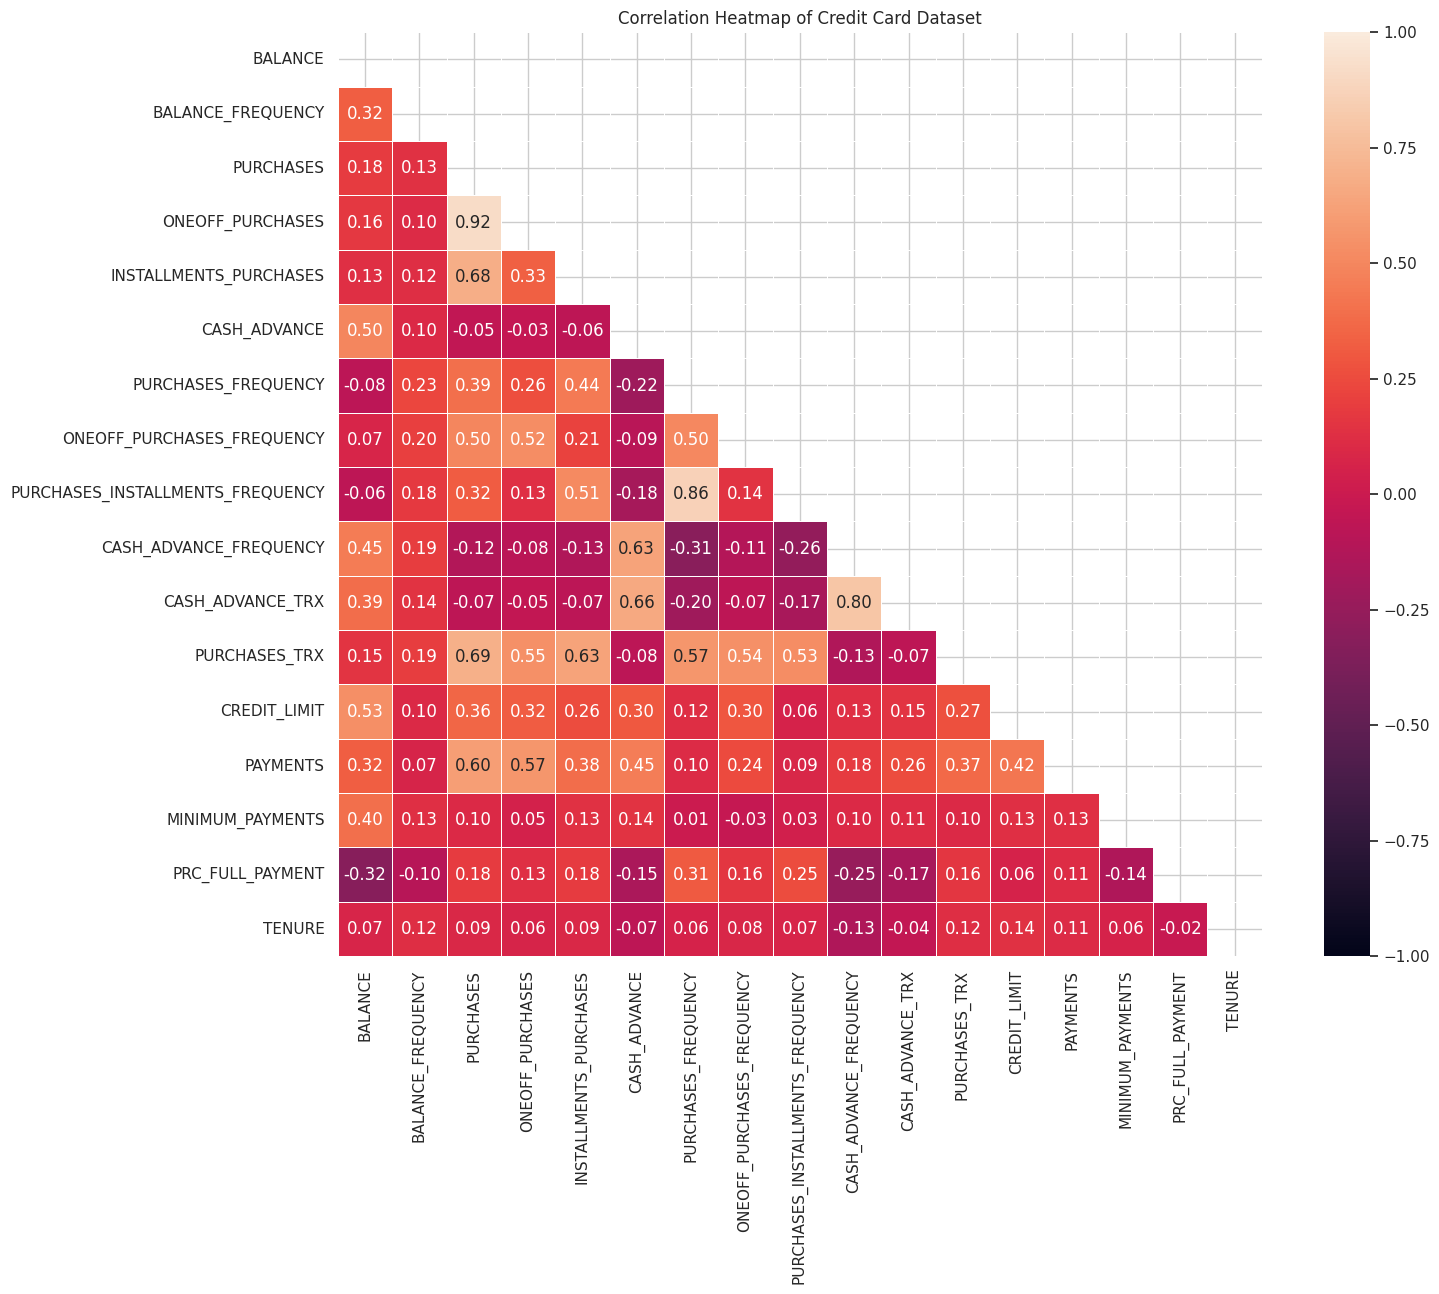

In [19]:
correlation = df.corr()
mask = np.triu(np.ones_like(correlation, dtype=bool))
plt.figure(figsize=(16, 12))
plt.title('Correlation Heatmap of Credit Card Dataset')
cmap = sns.diverging_palette(220, 20, as_cmap=True)
heatmap = sns.heatmap(correlation,mask=mask, annot=True, fmt='.2f', vmax=1, vmin=-1, square=True, linewidths=.5)
plt.show()

Berdasarkan heatmap di atas fitur yang berkolerasi tinggi adalah sebagai berikut:
*   PURCHASES dengan ONEOFF_PURCHASES
*   PURCHASES_INSTALLMENT_FREQUENCY dengan PURCHASES_FREQUENCY
*   CASH_ADVANCE_TRX dengan CASH_ADVANCE_FRQUENCY

NB:
*   Korelasi tinggi antara jumlah maksimum pembelian yang dilakukan secara langsung dan jumlah pembelian yang dilakukan adalah hubungan yang diharapkan menurut logika bisnis. Oleh karena itu, sebaiknya tidak menghapus kedua variabel ini karena korelasi tinggi, karena hal tersebut dapat memengaruhi model.
*   Hubungan antara frekuensi pembelian dengan pembayaran angsuran dan frekuensi pembelian secara keseluruhan sangat berkorelasi menurut logika bisnis, karena peningkatan frekuensi pembelian oleh konsumen dapat berdampak pada peningkatan frekuensi penggunaan kartu kredit dengan pembayaran angsuran.
*   Korelasi antara jumlah transaksi yang dilakukan dengan penarikan tunai yang diberikan oleh pelanggan dan frekuensi pembayaran penarikan tunai sesuai dengan logika bisnis kartu kredit.



Pada kasus ini kita akan melakukan clustering dengan K-Means yang mana metodenya berbasis jarak. Normalisasi dengan Standar Scaler dapat mengurangi perbedaan skala antar fitur, sehingga mempermudah proses K-Means Clustering.

In [20]:
scaler = StandardScaler()
scaled_data = scaler.fit_transform(df)

In [21]:
df_scaled = pd.DataFrame(data=scaled_data, columns=df.columns)
df_scaled.head()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,-0.731989,-0.249434,-0.424900,-0.356934,-0.349079,-0.466786,-0.806490,-0.678661,-0.707313,-0.675349,-0.476070,-0.511333,-0.960378,-0.528979,-0.302400,-0.525551,0.36068
1,0.786961,0.134325,-0.469552,-0.356934,-0.454576,2.605605,-1.221758,-0.678661,-0.916995,0.573963,0.110074,-0.591796,0.688678,0.818642,0.097500,0.234227,0.36068
2,0.447135,0.518084,-0.107668,0.108889,-0.454576,-0.466786,1.269843,2.673451,-0.916995,-0.675349,-0.476070,-0.109020,0.826100,-0.383805,-0.093293,-0.525551,0.36068
3,0.049099,-1.016953,0.232058,0.546189,-0.454576,-0.368653,-1.014125,-0.399319,-0.916995,-0.258913,-0.329534,-0.551565,0.826100,-0.598688,-0.228307,-0.525551,0.36068
4,-0.358775,0.518084,-0.462063,-0.347294,-0.454576,-0.466786,-1.014125,-0.399319,-0.916995,-0.675349,-0.476070,-0.551565,-0.905410,-0.364368,-0.257266,-0.525551,0.36068


**Principal Component Analysis (PCA)**

Principal Component Analysis (PCA) adalah teknik dalam analisis data yang digunakan untuk mereduksi dimensi dari dataset dengan memproyeksikan data ke ruang dimensi yang lebih rendah. PCA dapat membantu mempersiapkan data sehingga algoritma clustering dapat bekerja lebih baik dalam ruang fitur yang direduksi.

In [22]:
n_components = 2
pca = PCA(n_components=n_components)
pca

PCA(n_components=2)

In [23]:
principal_components = pca.fit_transform(df_scaled)

In [24]:
data_pca=pd.DataFrame(data=principal_components, columns=['pca1','pca2'])
data_pca.head()

,pca1,pca2
0,-1.683649,-1.072243
1,-1.134084,2.509147
2,0.969394,-0.383572
3,-0.888220,0.004646
4,-1.600021,-0.683796


Data sudah direduksi menjadi 2 dimensi data.

# **Modeling**

**K-Means**

Menggunakan elbow method untuk mencari K optimum.

In [25]:
wcss = []
for i in range(1,20):
   model = KMeans(n_clusters = i, init = "k-means++", max_iter = 300, n_init = 10, random_state = 0)
   model.fit(principal_components)
   wcss.append(model.inertia_)

Text(0.5, 1.0, 'Elbow Methods')

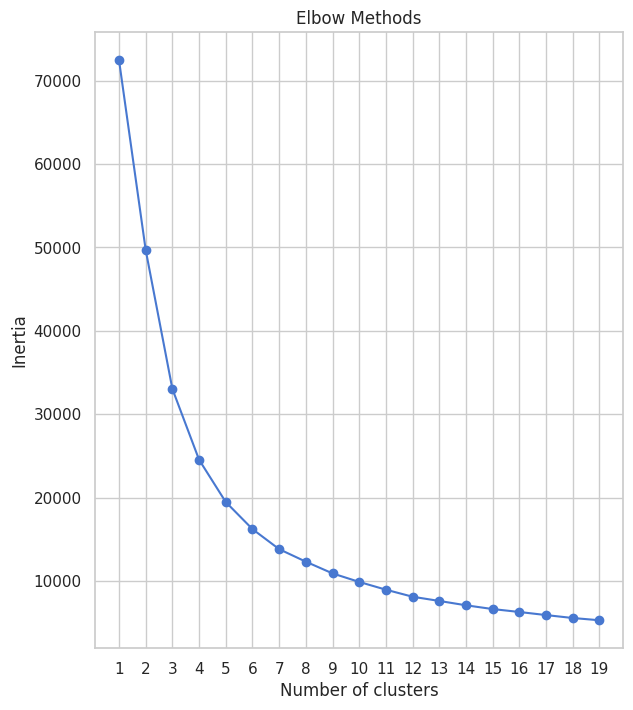

In [28]:
plt.figure(figsize=(15,8))

plt.subplot(1,2,1)
plt.plot(range(1,20), wcss, marker='o')
plt.xlabel('Number of clusters')
plt.xticks([i for i in range(1,20)])
plt.ylabel('Inertia')
plt.title('Elbow Methods')

Berdasarkan grafik di atas, dapat dilihat bahwa titik dimana terciptanya bentuk siku pada grafik Elbow terjadi ketika jumlah cluster (K) sama dengan 4-7 cluster. Karena kita juga harus melihat computation cost saat menentukan jumlah cluster, maka memilih jumlah cluster yang lebih sedikit yaitu 4.

In [29]:
kmeans = KMeans(n_clusters=4)
kmeans

KMeans(n_clusters=4)

In [30]:
kmeans_model = kmeans.fit_predict(principal_components)
labels = kmeans.labels_
labels

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


array([0, 1, 3, ..., 0, 0, 0], dtype=int32)

Output di atas merupakan hasil clustering dengan menggunakan K-means label dari clustering yang sudah dilakukan.

**Hierarchical Clustering**

Mencari juumlah cluster dengan dendogram. Dendrogram adalah representasi grafis dari hasil hierarchical clustering. Dalam dendrogram, setiap simpul (node) merepresentasikan suatu kelompok atau cluster, sementara tinggi dari garis yang menghubungkan dua simpul menunjukkan seberapa dekat atau seberapa jauh dua kelompok tersebut.

In [35]:
HC = linkage(df_scaled, method='ward')

Linkage adalah fungsi dalam konteks hierarchical clustering yang digunakan untuk menggabungkan atau mengelompokkan data berdasarkan jarak antar-data. Ward method mengukur jarak antara dua kelompok dengan mempertimbangkan seberapa besar varians yang akan bertambah jika dua kelompok tersebut digabungkan. Metode ini berusaha untuk meminimalkan pertambahan varians total setelah penggabungan kelompok.

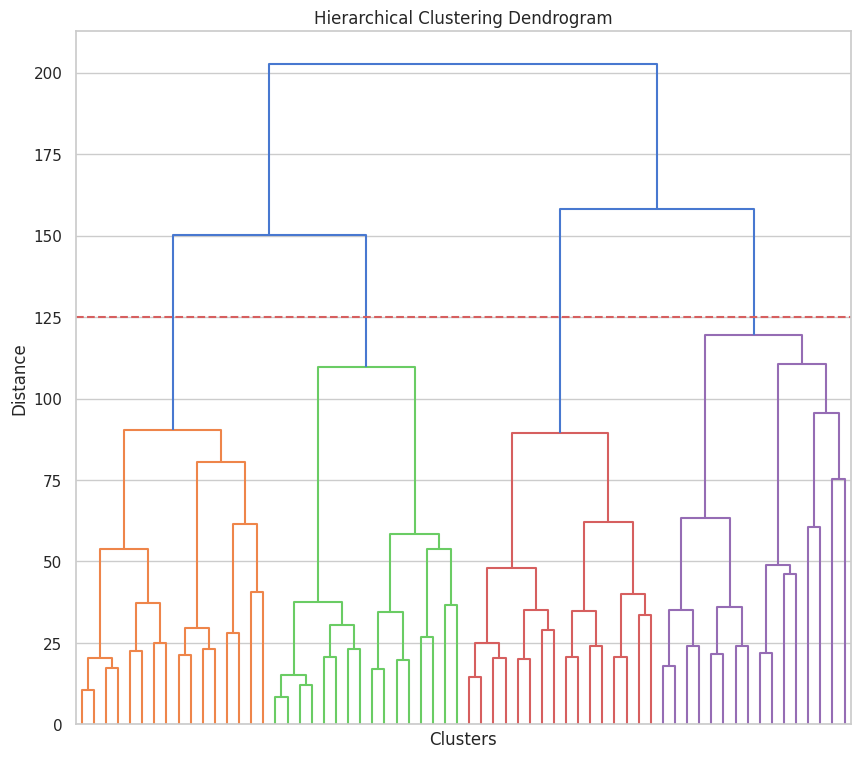

In [36]:
plt.figure(figsize=(10,9))
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('Clusters')
plt.ylabel('Distance')
dendrogram(HC, truncate_mode='level', p = 5, show_leaf_counts=True, no_labels=True)
plt.axhline(y=125, color='r', linestyle='--')
plt.show()

Sumbu x terdiri atas kumpulan data pengguna kartu kredit, sedangkan sumbu y merupakan jarak antara data-data tersebut. Garis vertikal dengan jarak maksimum adalah garis biru. Oleh karena itu kita dapat menentukan ambang batas sebesar 125 untuk memotong dendrogram tersebut. Setelah dilakukan pemotongan, didapatkan 4 cluster karena garis ini memotong dendrogram pada 4 titik. Langkah selanjutnya menerapkan hierarchical clustering dengan 4 cluster.

In [37]:
hc_model = AgglomerativeClustering(n_clusters = 4, affinity = "euclidean", linkage = 'ward')
hc_model

AgglomerativeClustering(affinity='euclidean', n_clusters=4)

Model ini akan melakukan hierarchical clustering dengan menggunakan algoritma agglomerative (menggabungkan) untuk membentuk 4 cluster dengan mengukur kedekatan dengan jarak Euclidean, dan menggunakan metode ward untuk penggabungan antar-kelompok.

In [38]:
y_hc = hc_model.fit_predict(principal_components)
y_hc

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


array([1, 1, 2, ..., 2, 1, 1])

Output di atas merupakan hasil clustering dengan menggunakan AgglomerativeClustering.

# **Model Evaluation**

Pada kasus kali ini kita akan mengevaluasi model dengan menggunakan Silhouette Score. Parameter ini mengukur seberapa baik setiap data dalam suatu kelompok dibandingkan dengan kelompok lainnya. Rentang nilai Silhouette Score adalah dari -1 hingga 1. Nilai yang lebih tinggi menunjukkan bahwa objek berada dalam kelompok yang sesuai dengan karakteristiknya sendiri dan tidak terlalu dekat dengan kelompok lain.

**K-Means**

In [31]:
print(f'Silhouette Score to KMeans with PCA : {round(silhouette_score(principal_components, kmeans_model),3)}')

Silhouette Score to KMeans with PCA : 0.407


Nilai Silhouette Score sebesar 0.407 dapat diinterpretasikan sebagai indikasi pengelompokan yang relatif baik.

In [33]:
kmeans_data = df.copy()
kmeans_data['KMeansCluster'] = kmeans.labels_
kmeans_data.head()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,KMeansCluster
0,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12,0
1,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12,1
2,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12,3
3,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,312.343947,0.000000,12,0
4,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12,0


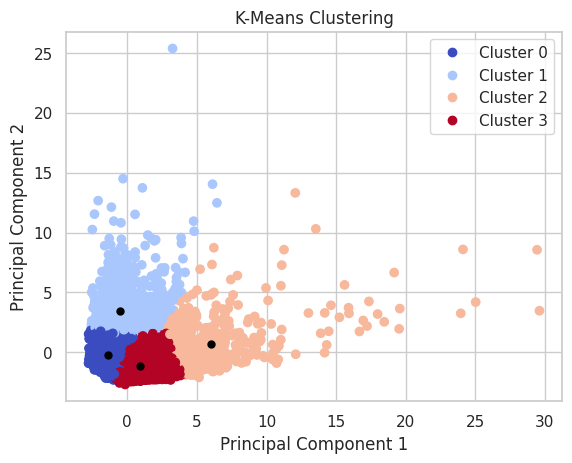

In [34]:
scatter = plt.scatter(principal_components[:, 0], principal_components[:, 1], c=kmeans_model, cmap='coolwarm')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 25, c = 'black', label = 'Centroids')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('K-Means Clustering')

legend_labels = ['Cluster {}'.format(i) for i in range(len(np.unique(kmeans_model)))]
legend_labels.append('Centroids')

plt.legend(handles=scatter.legend_elements()[0], labels=legend_labels)

plt.show()

Gambar di atas menunjukkan bahwa ke 4 cluster terpisah dengan sangat baik di ruang PCA.

Clustering dengan algoritma K-Means menunjukkan hasil yang relatif baik dengan Nilai Silhouette Score sebesar 0.407 di mana data awal direduksi menggunakan PCA menjadi dua fitur utama. Dari hasil clustering, terlihat bahwa data berhasil terbagi dengan baik menjadi 4 cluster.

**Hierarchical Clustering**

In [39]:
print(silhouette_score(principal_components, y_hc))

0.37262640920876605


Nilai Silhouette Score sebesar 0.373 dapat diinterpretasikan sebagai indikasi pengelompokan yang relatif baik.

In [41]:
hc_data = df.copy()
hc_data['HCluster'] = y_hc
hc_data.head()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,HCluster
0,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12,1
1,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12,1
2,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12,2
3,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,312.343947,0.000000,12,1
4,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12,1


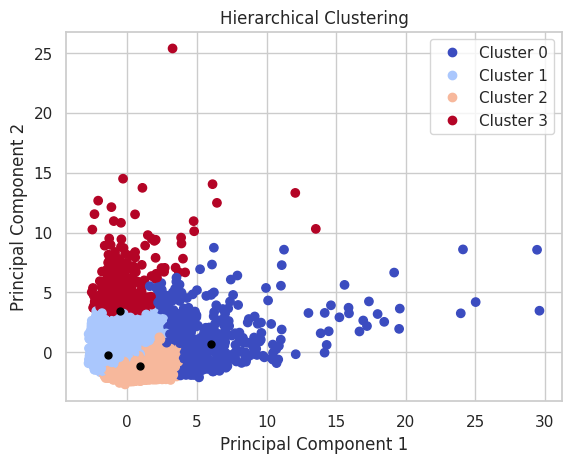

In [42]:
scatter = plt.scatter(principal_components[:, 0], principal_components[:, 1], c=y_hc, cmap='coolwarm')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 25, c = 'black', label = 'Centroids')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('Hierarchical Clustering')

legend_labels = ['Cluster {}'.format(i) for i in range(len(np.unique(kmeans_model)))]
legend_labels.append('Centroids')

plt.legend(handles=scatter.legend_elements()[0], labels=legend_labels)

plt.show()

Gambar di atas menunjukkan bahwa ke 4 cluster terpisah dengan sangat baik di ruang PCA.

Berdasarkan evaluasi menggunakan metode dendrogram dan linkage, dilakukan pembentukan model hirarki clustering AgglomerativeClustering dengan empat cluster. Model ini menghasilkan Silhouette Score sebesar 0.373, menunjukkan tingkat kualitas clustering yang relatif baik.

In [43]:
pickle.dump(pca, open('model_PCA.pkl','wb'))
pickle.dump(kmeans, open('model_kmeans.pkl','wb'))
pickle.dump(hc_model, open('model_HC.pkl','wb'))

In [44]:
with open('model_PCA.pkl', 'rb') as file0:
    model_PCA= pickle.load(file0)

with open('model_kmeans.pkl', 'rb') as file1:
    model_kmeans = pickle.load(file1)

with open('model_HC.pkl', 'rb') as file2:
    model_HC = pickle.load(file2)

In [45]:
df_shuffled = df.sample(frac=1, random_state=42).reset_index(drop=True)
val = df_shuffled.head()

In [46]:
val

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,16.834929,0.454545,15.00,15.00,0.00,209.025389,0.090909,0.090909,0.000000,0.090909,1,1,7500.0,430.213001,86.959785,0.000000,11
1,540.020858,1.000000,612.23,495.61,116.62,1708.923217,0.666667,0.166667,0.500000,0.333333,10,10,2000.0,1642.068707,419.956251,0.000000,12
2,119.237712,1.000000,342.74,0.00,342.74,0.000000,1.000000,0.000000,1.000000,0.000000,0,20,2000.0,327.166041,165.207233,0.000000,12
3,894.081947,1.000000,1901.71,1853.11,48.60,206.618780,0.666667,0.666667,0.416667,0.083333,1,33,1500.0,947.130141,220.745296,0.000000,12
4,1294.145453,1.000000,3059.10,1836.98,1222.12,0.000000,1.000000,0.416667,1.000000,0.000000,0,42,7000.0,5560.033502,497.637767,0.083333,12


In [47]:
prediction_PCA = model_PCA.fit_transform(val)

Nilai di atas merupakan hasil reduksi data dengan PCA. Kedua model yang dimuat/load hanya menerima 2 kolom inputan (Berdasarkan hasil pelatihan sebelumnya). Hal inilah yang menyebabkan kita perlu mereduksi data validation di atas dengan PCA.

In [48]:
prediction_km = model_kmeans.predict(prediction_PCA)
prediction_km

array([2, 0, 0, 0, 2], dtype=int32)

In [49]:
prediction_HC = model_HC.fit_predict(prediction_PCA)
prediction_HC

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


array([2, 0, 3, 0, 1])

# **Conclusion**

Berikut merupakan kesimpulan yang dapat diambil dari beberapa kegiatan yang telah dilakukan.
1.   Hasil dari Exploratory Data Analysis (EDA) menunjukkan bahwa:
*   Mayoritas pengguna cenderung memilih tenur pembayaran kartu kredit selama 12 bulan.
*   Jumlah belanja yang sering dilakukan oleh pengguna cenderung kecil (di bawah 10000).
*   Frekuensi penggunaan kartu kredit cenderung jarang dan jumlah belanja berkisar di nominal yang kecil.
*   Pengguna cenderung melakukan pembelian dengan angsuran PURCHASE_INSTALLMENTS, sebagaimana terlihat dari kesamaan grafik PURCHASE_FREQUENCY dan PURCHASES_INSTALLMENTS_FREQUENCY.
2.  Hasil clustering dengan algoritma K-Means menunjukkan pembagian data dengan baik menjadi 4 cluster. Penggunaan elbow method menunjukkan bahwa jumlah cluster optimal adalah 4. Hasil Evaluasi Kmeans dengan Silhouette score mencapai 0.407. Begitu juga dengan Hierarchical Clustering menunjukkan pembagian data dengan baik menjadi 4 cluster dengan Silhouette score sebesar 0.373.
1.   Berdasarkan nilai parameter Silhouette Score yang lebih tinggi, dapat disimpulkan bahwa algoritma K-Means cenderung lebih efektif dalam mencluster data dibandingkan dengan algoritma Hierarchical clustering dalam dataset tersebut